In [1]:
from FDTD_Ez import *

Определим распределение диэлектрика

In [3]:
@njit
def circle_set(N, L, r):
    space = np.ones((N, N))    
    x = np.linspace(-L/2, L/2, N)
    y = x
    for k in range(-5,6):
        for l in range(-0,4):
            for i in range(0, N):
                for j in range(0, N):
                    if l%2 == 0:
                        if ((x[i] - 0.1*k)**2 + (y[j] - 0.1*l)**2) <= r**2:
                            space[i, j] = 4
                    else:
                        if ((x[i] - 0.1*k-0.05)**2 + (y[j] - 0.1*l)**2) <= r**2:
                            space[i, j] = 8                           
    return space

Определим функцию распределения источника

In [4]:
@njit
def esours(N, T, t, x, y):
    source = np.zeros((N, N, T))
    for i in range(250, N):
        for k in range(0, T):            
            source[N-i,i-200,k] = 4*np.sin(599584916021005.8*(t[k])) 
    return source

In [5]:
N = 300
r = 0.015
L = 1

In [6]:
set_circ = circle_set(N, L, r)

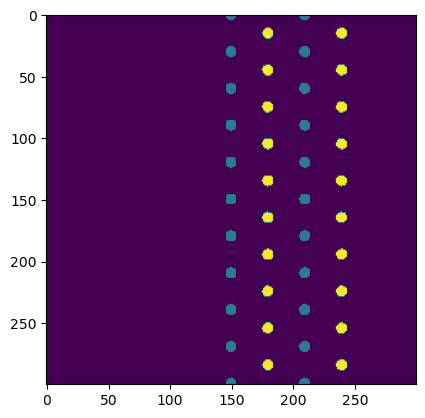

In [7]:
plt.imshow(set_circ)

Выполним расчет

In [8]:
start = datetime.datetime.now()
print('Время старта: ' + str(start))
test = FDTD(N = 300, T = 1000)
source = esours(test.N, test.T, test.time, test.x, test.y)        
test.set_source(source)
test.set_epsilon(set_circ)
test.calc_field(True)
finish = datetime.datetime.now()
print('Время окончания: ' + str(finish))
print('Время работы: ' + str(finish - start)) 

Время старта: 2024-05-07 00:07:20.465941
Время окончания: 2024-05-07 00:08:04.532719
Время работы: 0:00:44.066778


Выведем анимацию решения

In [ ]:
fig1, ax = plt.subplots()
ims = []
for i in range(test.T):
    im = ax.imshow(test.Ez[:,:,i], animated=True, cmap='plasma', aspect='equal', vmin=-1, vmax=1)
    ims.append([im])
ani = animation.ArtistAnimation(fig1, ims, interval=5, blit=True,
                                repeat_delay=1000)
fig1.colorbar(im)
ani.save("refractive_on_photonic_crystal.gif")

plt.show()

<img src='refractive_on_photonic_crystal.gif' width=500, heigth=500>